# Анализ данных банка «Метанпром»

В один из лучших банков страны "Метанпромбанк" требуется аналитик, способный:  

- Провести исследовательский анализ данных;
- Сегментировать пользователей на основе данных о количестве потребляемых продуктов;
- Сформулировать и проверить статистические гипотезы;
- Дать рекомендации для менеджера проекта для снижения оттока клиентов. 



Датасет - https://disk.yandex.ru/d/JVAJ9uxtV1uydQ

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

Содержание: 
- [Загрузка и предобработка данных](#загрузка-и-предобработка-данных) 
- [EDA](#EDA)
- [Кластеризация пользователй с помощью машинного обучения](#Кластеризация-пользователей-алгоритмом-KMeans)
- [Проверка статистических гипотез](#Проверка-статистической-гипотезы)
- [Общие выводы и рекомендации](#Общие-выводы-и-рекомендации) 
- [Доп.материалы](#Доп.материалы)

## Загрузка и предобработка данных 

In [1]:
pip install phik==0.10.0

     |████████████████████████████████| 599 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%autosave 30
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats as st
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage 
import phik as ph
from phik.report import plot_correlation_matrix
from phik import report

Autosaving every 30 seconds


In [3]:
#df = pd.read_csv('D:/Practikum/bank_dataset.csv')
#https://disk.yandex.ru/d/fCJVSwQ3PzFhaA
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

In [4]:
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Переименуем столбцы: 

In [5]:
df = df.rename(columns={'userid': 'user_id', 'CreditCard': 'Credit_Card', })

In [6]:
df.head()

,user_id,score,City,Gender,Age,Objects,Balance,Products,Credit_Card,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Приведем название смолбцов к нижнему регистру:

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Привели названия всех столбцов в порядок, идем дальше 

In [9]:
df.sample(10)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
272,15839241,811,Ростов Великий,Ж,34,1,149297.19,2,1,1,186339.74,0
1500,15632882,630,Ярославль,М,50,1,81947.76,1,0,1,63606.22,1
8462,15821217,817,Ярославль,М,59,1,118962.58,1,1,1,120819.58,0
9253,15710057,644,Рыбинск,М,49,10,NaN,2,1,1,145089.64,0
6386,15626826,621,Рыбинск,Ж,40,7,NaN,2,0,1,131283.60,1
458,15750098,514,Ростов Великий,М,43,1,95556.31,1,0,1,199273.98,1
1963,15813875,578,Ростов Великий,М,34,8,147487.23,2,1,0,66680.77,0
7203,15700514,657,Ярославль,М,33,1,84309.57,2,0,0,103914.40,0
4680,15772318,676,Ростов Великий,М,48,3,80697.44,1,0,0,101397.86,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Проверим данные на дубликаты и пропуски 

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Обнаружены пропуски в столбце "Баланса". Найдем причину данных пропусков 

## EDA

In [13]:
df.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df_update = pd.get_dummies(df, prefix='city_', columns=['city'])

Мы применяем метод унитарного кодирования, для привидения названий город к числовому формату. Измененный датафрейм нам пригодится в дальнейшем, а для анализа, будем использовать первоначальный 

In [15]:
cleanup_nums = {"gender": {"М": 1, "Ж": 0}}

In [16]:
df_update = df_update.replace(cleanup_nums)

In [17]:
df_update.head(10)

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city__Ростов Великий,city__Рыбинск,city__Ярославль
0,15677338,619,0,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,0,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,15616748,645,1,44,8,113755.78,2,1,0,149756.71,1,0,1,0
6,15635267,822,1,50,7,NaN,2,1,1,10062.80,0,0,0,1
7,15698884,376,0,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,15835101,501,1,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,15635125,684,1,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [18]:
df_update = df_update.rename(columns={'city__Ростов Великий': 'city_3', 'city__Рыбинск': 'city_2', 'city__Ярославль': 'city_1'})

In [19]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   objects           10000 non-null  int64  
 5   balance           6383 non-null   float64
 6   products          10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   loyalty           10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  city_3            10000 non-null  uint8  
 12  city_2            10000 non-null  uint8  
 13  city_1            10000 non-null  uint8  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 888.8 KB


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


#### Данные в разрезе о городах 

In [21]:
df['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [22]:
df[df['balance'].isna()]['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

In [23]:
df_city = df.query('city == "Ростов Великий"')

In [24]:
df_city.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,2.509000e+03,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000
mean,1.573329e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432
std,7.322843e+04,98.168937,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256
min,1.560852e+07,350.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567013e+07,584.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000
50%,1.573262e+07,651.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000
75%,1.579847e+07,722.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000
max,1.585839e+07,850.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000


In [25]:
df.groupby(['city', 'products']).agg({'user_id':'count'})

user_id
city           products         
Ростов Великий 1            1349
               2            1040
               3              96
               4              24
Рыбинск        1            1221
               2            1183
               3              66
               4               7
Ярославль      1            2514
               2            2367
               3             104
               4              29

In [26]:
df.groupby('city').agg({'churn':'mean'})

,churn
city,
Ростов Великий,0.324432
Рыбинск,0.166734
Ярославль,0.161548


Изучив данные в разрезе по городам мы узнали: 

* Пропущенны значения баланса только в 2х городах из 3х - в Ярославле и Рыбинске
* Во всех городах есть клиенты с разными количествами используемых продуктов 
* Самый отточный город - Ростов Великий

#### Данные в разрезе о продуктах: 

In [27]:
df[df['balance'].isna()]['products'].value_counts()

2    2600
1     905
3      98
4      14
Name: products, dtype: int64

In [28]:
df_products = df.pivot_table(index='products', aggfunc='mean')

In [29]:
df_products

,age,balance,churn,credit_card,estimated_salary,loyalty,objects,score,user_id
products,,,,,,,,,
1,39.673092,119894.163723,0.277144,0.703777,99487.256851,0.504131,4.974626,649.120968,1.573237e+07
2,37.753595,119660.944362,0.075817,0.707190,100452.012821,0.532898,5.051852,652.188671,1.573484e+07
3,43.195489,119475.686310,0.827068,0.714286,104318.130564,0.424812,5.003759,648.105263,1.574182e+07
4,45.683333,122260.610870,1.000000,0.683333,104763.723333,0.483333,5.300000,653.583333,1.571936e+07


In [30]:
df.groupby('products').agg({'user_id':'count'})

,user_id
products,
1,5084
2,4590
3,266
4,60


In [31]:
df.groupby(['churn', 'products']).agg({'user_id' : 'count'})

user_id
churn products         
0     1            3675
      2            4242
      3              46
1     1            1409
      2             348
      3             220
      4              60

Изучив данные в разрезе о продуктах мы узнали: 

* Все у кого были 4 продукта - оказались в оттоке 
* Наибольшее количество пользователей у одного и двух продуктов
* Всеми 4 продуктами банка пользуются люди 45+ возраста 

#### Данные в разрезе о кредитках 

In [32]:
df[df['balance'].isna()]['credit_card'].value_counts()

1    2592
0    1025
Name: credit_card, dtype: int64

In [33]:
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [34]:
df[df['credit_card'] == 0]['products'].value_counts()

1    1506
2    1344
3      76
4      19
Name: products, dtype: int64

In [35]:
df[df['credit_card'] == 1]['products'].value_counts()

1    3578
2    3246
3     190
4      41
Name: products, dtype: int64

Изучив данные в разрезе о кредитных картах мы узнали: 

* Пользователей с кредитными картами в 2 раза больше 
* Банк предлагает не 4, а все 5 продуктов..доказывает это 19 человек у которых все еще 4 продукта банка, но нет кредитной карты


Создадим срез данных о пользователях без указанного баланса 

In [36]:
df_not_balance = df[df['balance'].isnull()].reset_index()

In [37]:
df_not_balance

,index,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
2,6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
3,11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
4,12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
3613,9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
3614,9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
3615,9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


In [38]:
df_not_balance.describe()

,index,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,3617.000000,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,5031.100083,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,2875.309344,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,0.000000,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2560.000000,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,5066.000000,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,7527.000000,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,9997.000000,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


In [39]:
df_not_balance['credit_card'].value_counts()

1    2592
0    1025
Name: credit_card, dtype: int64

Изучив данные пользователей без указанного баланса можно построить такой портрет : 

* Пользователи от 30-40 лет 
* Чаще пользуются кредиткой 
* Средней активности 
* Пользуются двумя продуктами банка 

Предпологаю, что это такие продукты банка, при которых не нужно указывать свой доход, возможно это дебетовая карта и вклады. 

#### Данные в разрезе о очках скоринга

In [40]:
df[df['balance'].isna()]['score'].mean()

649.4528614874205

In [41]:
df[df['balance'] > 0]['score'].mean()

651.1384928716905

Судя по среднему, баллы кредитного скоринга не отличаются у клиентов с указанным и НЕ указанным балансом

#### Данные в разрезе о возрасте 

In [42]:
df[df['balance'].isna()]['age'].mean()

38.434890793475255

In [43]:
df[df['balance'] > 0]['age'].mean()

39.19771267429108

In [44]:
df.groupby('products').agg({'age' : 'mean'})

,age
products,
1,39.673092
2,37.753595
3,43.195489
4,45.683333


Средний возраст так же +- один

#### Данные в разрезе об объектах собственности 

In [45]:
df[df['balance'].isna()]['objects'].value_counts(ascending = False)

7     386
2     382
5     374
4     369
6     367
8     363
9     360
3     352
1     349
10    178
0     137
Name: objects, dtype: int64

In [46]:
df[df['balance'] > 0]['objects'].value_counts()

1     686
2     666
8     662
3     657
7     642
5     638
9     624
4     620
6     600
10    312
0     276
Name: objects, dtype: int64

*Тут надо будет что то написать!!*

#### Данные в разрезе о ЗП

In [47]:
df[df['balance'].isna()]['estimated_salary'].mean()

98983.55954935029

In [48]:
df[df['balance'] > 0]['estimated_salary'].mean()

100717.35295629015

Разница так же незначительна 

#### Данные в разрезе о лояльности 

In [49]:
df[df['balance'].isna()]['loyalty'].mean()

0.5178324578379873

In [50]:
df[df['balance'].isna()]['loyalty'].value_counts()

1    1873
0    1744
Name: loyalty, dtype: int64

In [51]:
df[df['balance'] > 0]['loyalty'].mean()

0.513551621494595

In [52]:
df[df['balance'] > 0]['loyalty'].value_counts()

1    3278
0    3105
Name: loyalty, dtype: int64

Оставим пользователей с указанным балансом 

In [53]:
df_balance = df_update.query('balance > 0').reset_index()

In [54]:
df_balance.describe()

,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1
count,6383.000000,6.383000e+03,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,4981.593451,1.573310e+07,651.138493,0.547392,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796,0.393075,0.200219,0.406705
std,2893.512280,7.192913e+04,96.934609,0.497788,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600,0.488472,0.400196,0.491257
min,1.000000,1.560844e+07,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,2460.500000,1.567094e+07,584.000000,0.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000,0.000000,0.000000,0.000000
50%,4965.000000,1.573226e+07,652.000000,1.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000,0.000000,0.000000,0.000000
75%,7481.500000,1.579584e+07,718.000000,1.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000,1.000000,0.000000,1.000000
max,9999.000000,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000


In [55]:
df_balance['products'].value_counts()

1    4179
2    1990
3     168
4      46
Name: products, dtype: int64

In [56]:
df_balance.groupby(['churn', 'products']).agg({'user_id' : 'count'})

user_id
churn products         
0     1            3108
      2            1728
      3              10
1     1            1071
      2             262
      3             158
      4              46

Создадим срез с оттоком пользователей

In [57]:
df_churn = df_balance.pivot_table(index='churn', aggfunc='mean')

In [58]:
df_churn

,age,balance,city_1,city_2,city_3,credit_card,estimated_salary,gender,index,loyalty,objects,products,score,user_id
churn,,,,,,,,,,,,,,
0,37.418696,119535.864270,0.438093,0.212134,0.349773,0.699752,100512.654439,0.579034,4990.169212,0.561907,4.981634,1.360710,652.820264,1.573340e+07
1,44.806766,120746.971132,0.307742,0.162655,0.529603,0.697463,101362.745940,0.447625,4954.554977,0.361093,4.973325,1.465843,645.836044,1.573216e+07


Матрица корреляции 

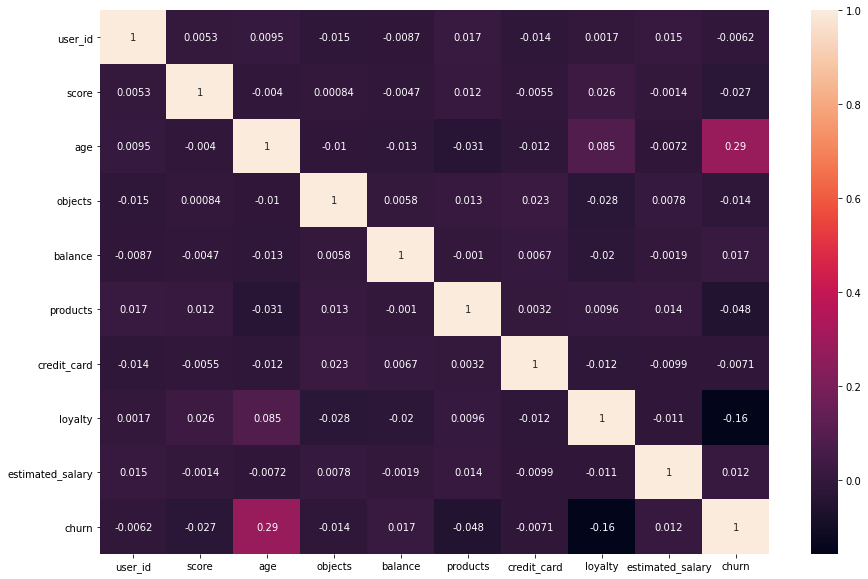

In [59]:
corr_df = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_df, 
         annot = True)
plt.show()

Построим матрицу корреляции без пропущенных значений баланса

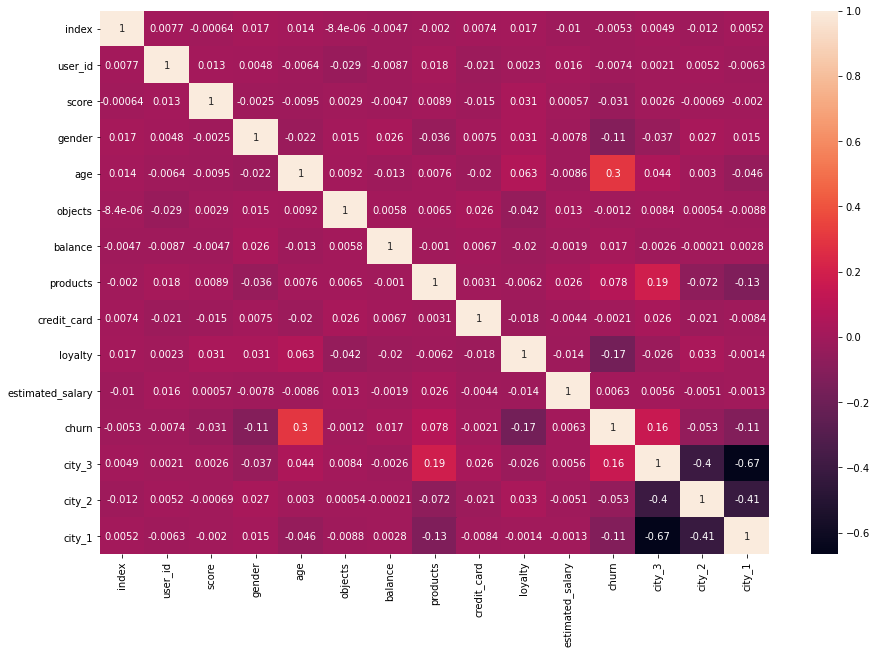

In [60]:
corr_df_4 = df_balance.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_df_4, 
         annot = True)
plt.show()

In [61]:
phik_overview = df_balance.phik_matrix()


interval columns not set, guessing: ['index', 'user_id', 'score', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'city_3', 'city_2', 'city_1']


In [62]:
phik_overview.round(2)

,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1
index,1.00,0.00,0.04,0.00,0.05,0.00,0.00,0.00,0.03,0.00,0.04,0.00,0.00,0.00,0.00
user_id,0.00,1.00,0.03,0.00,0.06,0.04,0.02,0.03,0.03,0.05,0.00,0.04,0.02,0.00,0.03
score,0.04,0.03,1.00,0.00,0.02,0.00,0.00,0.05,0.00,0.04,0.00,0.10,0.00,0.04,0.02
gender,0.00,0.00,0.00,1.00,0.03,0.02,0.00,0.07,0.00,0.04,0.02,0.17,0.05,0.04,0.01
age,0.05,0.06,0.02,0.03,1.00,0.03,0.00,0.12,0.02,0.17,0.02,0.50,0.09,0.00,0.08
objects,0.00,0.04,0.00,0.02,0.03,1.00,0.07,0.07,0.00,0.04,0.00,0.04,0.02,0.00,0.02
balance,0.00,0.02,0.00,0.00,0.00,0.07,1.00,0.04,0.05,0.02,0.00,0.11,0.14,0.07,0.08
products,0.00,0.03,0.05,0.07,0.12,0.07,0.04,1.00,0.00,0.06,0.00,0.50,0.30,0.11,0.21
credit_card,0.03,0.03,0.00,0.00,0.02,0.00,0.05,0.00,1.00,0.02,0.00,0.00,0.03,0.03,0.00
loyalty,0.00,0.05,0.04,0.04,0.17,0.04,0.02,0.06,0.02,1.00,0.06,0.27,0.04,0.05,0.00


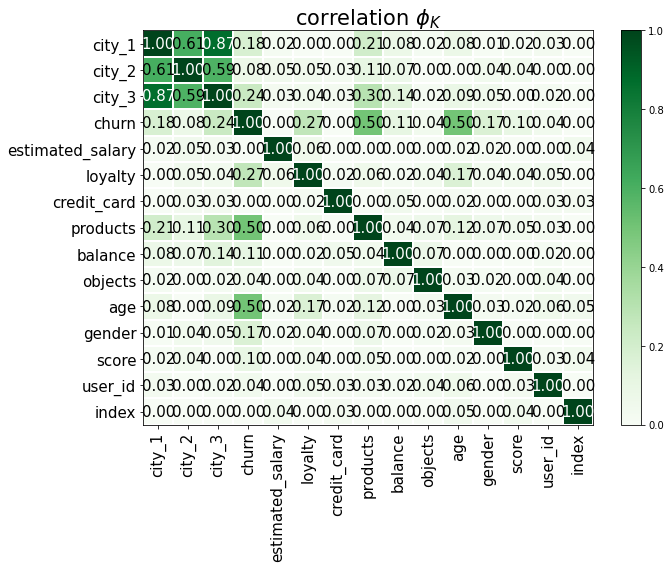

In [63]:
plot_correlation_matrix(phik_overview.round(2).values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

Судя по коэффициентам корреляции Phik, такие параметры как "products" и "age" больше всего влияют на отток клиентов 

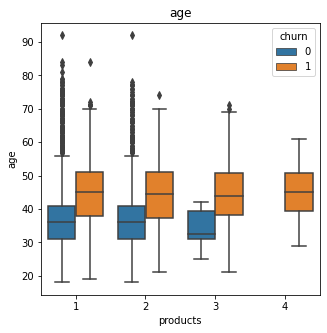

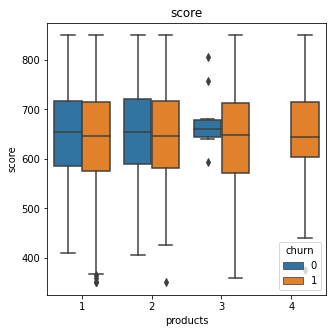

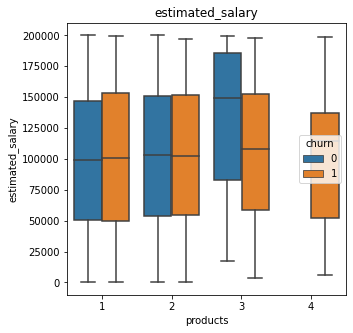

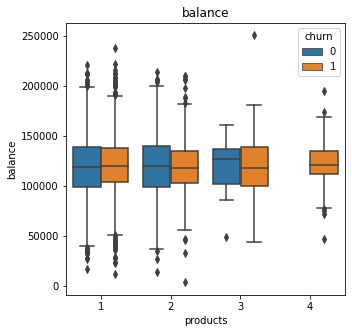

In [64]:
for columns in ['age', 'score', 'estimated_salary', 'balance']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y = df_balance[columns], x = 'products', hue='churn', data=df_balance)
    plt.title(columns)
    plt.show()

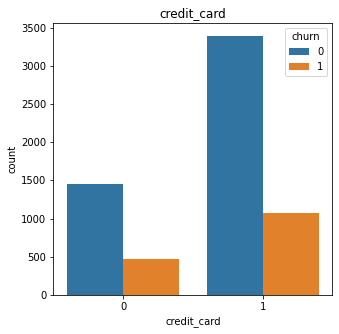

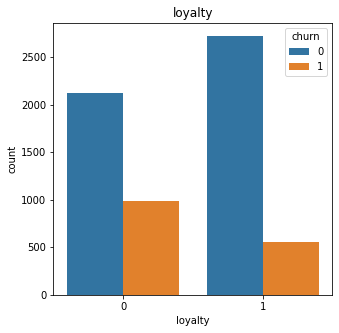

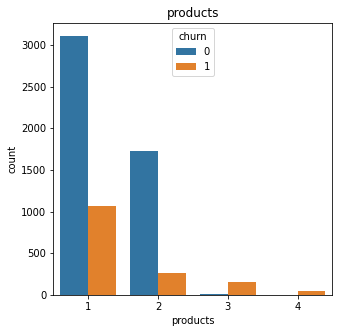

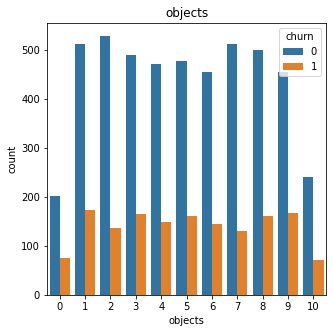

In [65]:
for columns in ['credit_card', 'loyalty', 'products', 'objects']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df_balance[columns], hue='churn', data=df_balance)
    plt.title(columns)
    plt.show()


Промежуточный вывод на EDA: 

* Распределения очков скоринга, наличию кредитной карты, пола, возраста, количества объектов, активности клиента (`loyalty`) и оттока примерно сопоставимы у клиентов с пропущенным значением баланса и заполненным;
* Пропущенных значений баланса нет только в Ростове Великом (столбец `city`);
* Количество продуктов у клиентов с пропущенным значением баланса в основном 2, а у клиентов с заполненным значением баланса - в основном 1 (столбец `products`);
* Наибольшее влиятние на отток клиентов имеет их возраст и количество использованных продуктов. Все клиенты с 4 продуктами попали в отток, те, у кого 3 продукта потенциально находятся в зоне риска. Клиенты старше 40 лет так же находятся в зоне риска;
* Наличие кредитной карты наоборот, говорит о том, что клиенты останется с банком;
* Люди из Ростова оттекают больше, чем из других городов;
* Зарплата в среднем 100к, но сильно выделяются клиенты с 3 продуктами и оставшиеся с банком..у них средний показатель 150к.

## Кластеризация пользователей алгоритмом KMeans

Проведем кластеризацию с помощью алгоритма МЛ, KMeans: 

In [66]:
X = df_balance.drop('churn', axis = 1) 

In [67]:
scaler = StandardScaler() 
x_sc = scaler.fit_transform(X)

In [68]:
linked = linkage(x_sc, method = 'ward')

In [69]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей банка')
plt.show()

In [70]:
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(x_sc)

In [71]:
df_balance['cluster'] = labels

In [72]:
mean_clasters = df_balance.groupby('cluster').mean().head(5)

In [73]:
mean_clasters.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

cluster,0,1,2
index,4909.62,4999.93,4999.28
user_id,15733855.74,15732554.52,15733291.65
score,651.00,650.90,651.45
gender,0.57,0.56,0.52
age,39.26,38.61,39.77
objects,4.98,4.95,5.01
balance,119814.99,119927.77,119730.12
products,1.30,1.30,1.52
credit_card,0.68,0.69,0.71
loyalty,0.55,0.51,0.50


In [74]:
df_balance.head(10)

,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
0,1,15690047,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0
1,2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1
2,4,15780624,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0
3,5,15616748,645,1,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0
4,7,15698884,376,0,29,4,115046.74,4,1,0,119346.88,1,1,0,0,2
5,8,15835101,501,1,44,4,142051.07,2,0,1,74940.50,0,0,0,1,1
6,9,15635125,684,1,27,2,134603.88,1,1,1,71725.73,0,0,0,1,1
7,10,15810557,528,1,31,6,102016.72,2,0,0,80181.12,0,0,0,1,1
8,15,15686702,616,1,45,3,143129.41,2,0,1,64327.26,0,1,0,0,2
9,16,15780188,653,1,58,1,132602.88,1,1,0,5097.67,1,1,0,0,2


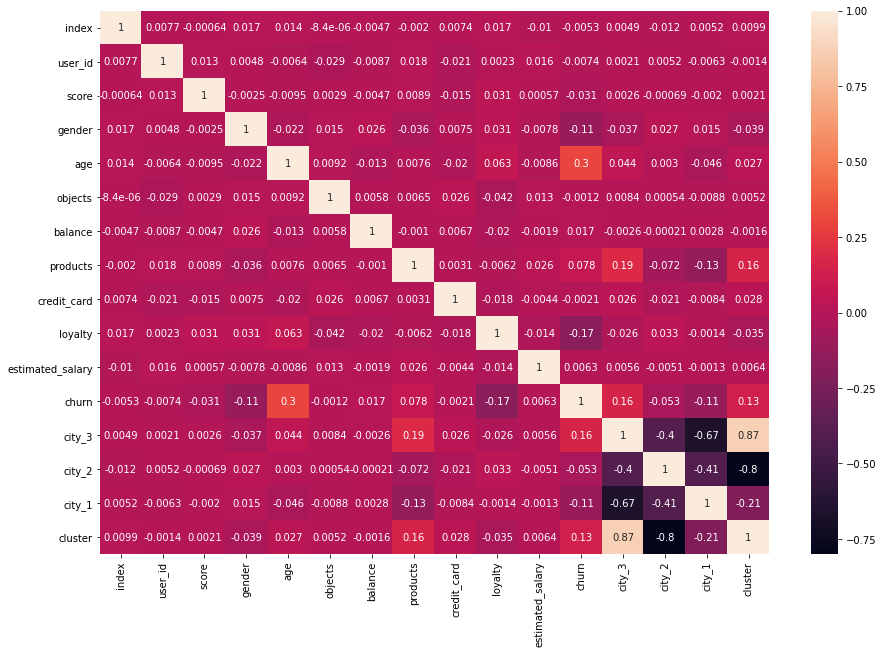

In [75]:
corr_df_3 = df_balance.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_df_3, 
         annot = True)
plt.show()

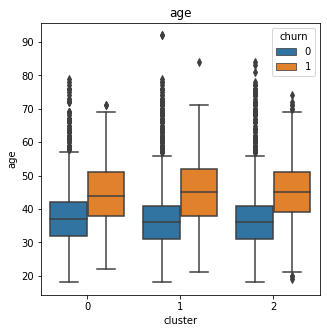

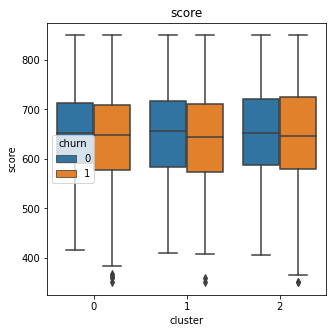

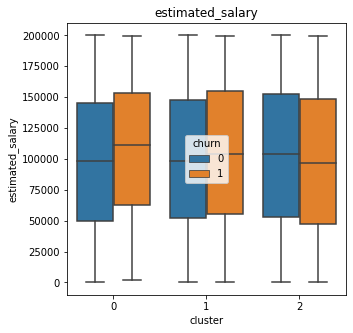

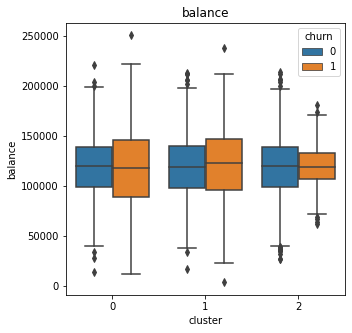

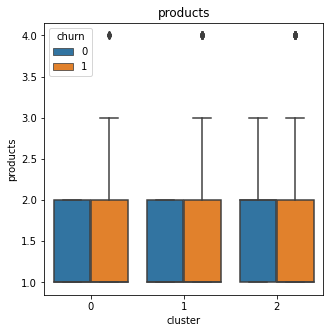

In [76]:
for columns in ['age', 'score', 'estimated_salary', 'balance', 'products']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y = df_balance[columns], x='cluster',hue='churn', data=df_balance)
    plt.title(columns)
    plt.show()

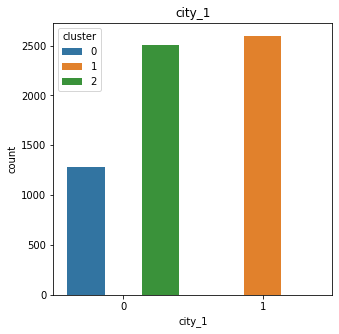

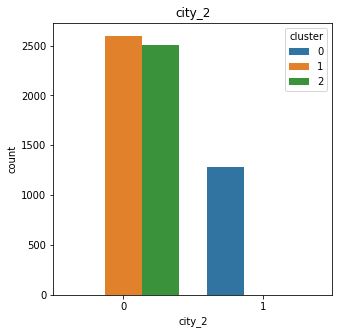

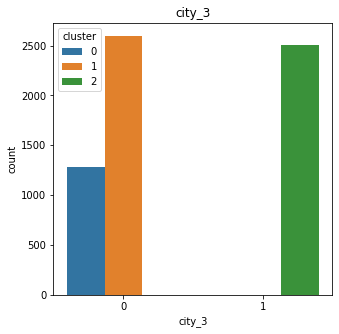

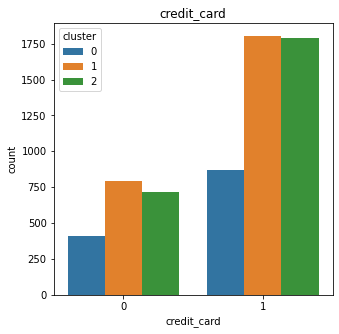

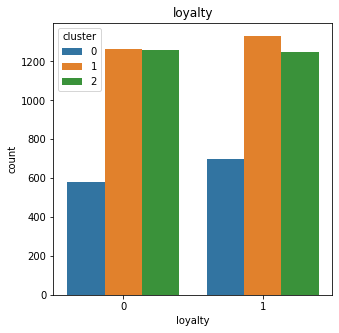

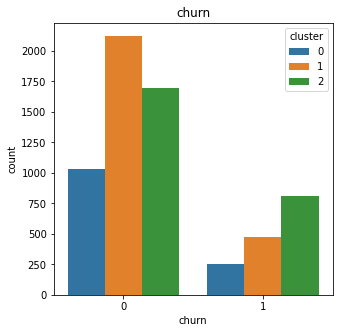

In [77]:
for columns in ['city_1', 'city_2', 'city_3', 'credit_card', 'loyalty', 'churn']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df_balance[columns], hue='cluster', data=df_balance)
    plt.title(columns)
    plt.show()


Кластеры пользователей алгоритмом КMeans и построением дендограммы показали следующие результаты: 

* Клиенты кластера 2 оттекают чаще других;  
* Кластеризация строилась на основе городов пользователей;
* Объекты собственности, баллы скоринга, возраст и баланс равны во всех кластерах;

Полностью доверять моделям в построении сигментов мы не будем, данные изучены, идем дальше 

Проведем кластеризацию пользователей на основе полученных данных: 

Первый сегмент с "Надежными клиентами", которые с наименьшей вероятностью попадут в отток

In [79]:
segment_one = df_balance.query('age <= 40 and products <= 2 and estimated_salary <= 150000 and credit_card == 1').reset_index()

In [80]:
segment_one.sample(10)

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
296,867,1344,15733840,460,0,40,6,119507.58,2,1,0,91560.63,1,1,0,0,2
1238,3830,5990,15668230,573,0,32,9,125321.84,2,1,1,130234.63,0,0,0,1,1
642,1958,3021,15617041,680,1,36,3,116275.12,1,1,1,63795.80,0,0,0,1,1
1452,4527,7102,15719848,519,1,39,2,112957.26,2,1,0,97593.16,0,0,0,1,1
1578,4900,7675,15660994,640,1,37,5,158024.38,1,1,0,81298.09,0,0,1,0,0
1223,3765,5887,15734023,675,0,33,0,141816.25,1,1,0,64815.05,1,1,0,0,2
1563,4860,7610,15658406,762,1,36,5,119547.46,1,1,1,42693.65,0,0,0,1,1
1082,3343,5207,15793758,777,0,37,10,121532.17,2,1,1,73464.88,0,1,0,0,2
705,2140,3309,15796079,523,0,28,2,121164.11,1,1,1,59938.81,0,0,0,1,1
1440,4476,7017,15810465,646,1,25,5,182876.88,2,1,1,42537.59,1,0,1,0,0


In [81]:
segment_one.describe()

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
count,2092.00000,2092.000000,2.092000e+03,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.0,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000
mean,3213.93021,5018.011950,1.573199e+07,651.389101,0.568356,32.843212,5.015296,119927.403881,1.347514,1.0,0.511950,76487.398241,0.118069,0.372849,0.203155,0.423996,1.169694
std,1884.78302,2959.172818,7.300089e+04,94.301325,0.495424,4.999214,2.866178,30199.817527,0.476295,0.0,0.499977,43234.790165,0.322767,0.483678,0.402443,0.494308,0.739912
min,6.00000,9.000000,1.560888e+07,365.000000,0.000000,18.000000,0.000000,14262.800000,1.000000,1.0,0.000000,143.340000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1564.75000,2412.500000,1.566887e+07,586.000000,0.000000,29.000000,3.000000,100114.612500,1.000000,1.0,0.000000,39711.942500,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3231.50000,5027.500000,1.572912e+07,653.000000,1.000000,33.000000,5.000000,120670.745000,1.000000,1.0,1.000000,76678.025000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4877.50000,7639.000000,1.579648e+07,715.000000,1.000000,37.000000,7.000000,139988.652500,2.000000,1.0,1.000000,114150.710000,0.000000,1.000000,0.000000,1.000000,2.000000
max,6382.00000,9999.000000,1.585843e+07,850.000000,1.000000,40.000000,10.000000,214346.960000,2.000000,1.0,1.000000,149912.280000,1.000000,1.000000,1.000000,1.000000,2.000000


Характеристика первого сегмента пользователей: 

*Надёжные пользователи:*

* 1-2 продукта 
* До 40 лет 
* Доход от 75-150к 
* Пользуются кредитной картой 

Сегмент 2 - клиенты в оттоке 

In [82]:
segment_two = df_balance.query('products >= 3 and estimated_salary <= 200000').reset_index()

In [83]:
segment_two

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
0,1,2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1
1,4,7,15698884,376,0,29,4,115046.74,4,1,0,119346.88,1,1,0,0,2
2,46,70,15746529,738,1,58,2,133745.44,4,1,0,28373.86,1,1,0,0,2
3,141,227,15719631,547,0,39,6,74596.15,3,1,1,85746.52,1,1,0,0,2
4,147,237,15807602,539,0,43,3,116220.50,3,1,0,55803.96,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,6190,9716,15749194,812,1,39,5,115730.71,3,1,1,185599.34,1,1,0,0,2
210,6209,9747,15818497,610,0,69,5,86038.21,3,0,0,192743.06,1,1,0,0,2
211,6249,9800,15683243,762,0,35,3,119349.69,3,1,1,47114.18,1,0,1,0,0
212,6300,9877,15614918,505,0,33,3,106506.77,3,1,0,45445.78,1,1,0,0,2


In [84]:
segment_two.describe()

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
count,214.000000,214.000000,2.140000e+02,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,3135.906542,4892.925234,1.573475e+07,648.378505,0.411215,44.191589,5.182243,120074.314953,3.214953,0.719626,0.401869,106050.686262,0.953271,0.560748,0.140187,0.299065,1.420561
std,1769.240252,2778.500074,7.389160e+04,100.956699,0.493208,9.575287,2.838280,30697.506247,0.411753,0.450235,0.491425,57434.150058,0.211553,0.497460,0.347995,0.458922,0.725619
min,1.000000,2.000000,1.561077e+07,358.000000,0.000000,21.000000,0.000000,43772.660000,3.000000,0.000000,0.000000,3966.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1634.750000,2523.750000,1.566925e+07,581.250000,0.000000,38.000000,3.000000,102639.192500,3.000000,0.000000,0.000000,60025.252500,1.000000,0.000000,0.000000,0.000000,1.000000
50%,3200.500000,4979.500000,1.572495e+07,649.000000,0.000000,43.000000,5.000000,120003.275000,3.000000,1.000000,0.000000,108386.910000,1.000000,1.000000,0.000000,0.000000,2.000000
75%,4623.500000,7235.500000,1.580592e+07,713.500000,1.000000,50.000000,8.000000,138941.252500,3.000000,1.000000,1.000000,152230.195000,1.000000,1.000000,0.000000,1.000000,2.000000
max,6313.000000,9895.000000,1.585823e+07,850.000000,1.000000,71.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199357.240000,1.000000,1.000000,1.000000,1.000000,2.000000


Характеристика второго сегмента пользователей: 

*Клиенты с высоким оттоком:*

* 3-4 продукта банка 
* 45+ лет
* Доход до 200к
* Нет кредитной карты 
* Не активный пользователей 

Сегмент 3 активные и не активные пользователи из 3 города 

In [85]:
segment_three_1 = df_balance.query('city_3 == 1 and loyalty == 1').reset_index()

In [86]:
segment_three_1.describe()

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
count,1248.000000,1248.000000,1.248000e+03,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.0,1248.000000,1248.000000,1248.0,1248.0,1248.0,1248.0
mean,3237.983173,5055.555288,1.573372e+07,654.615385,0.552083,40.010417,4.842949,119874.607700,1.544872,0.699519,1.0,100576.684006,0.237179,1.0,0.0,0.0,2.0
std,1860.005377,2920.145939,7.370356e+04,96.118259,0.497479,11.335408,2.926419,27507.998876,0.601713,0.458651,0.0,58062.225692,0.425524,0.0,0.0,0.0,0.0
min,8.000000,15.000000,1.560920e+07,395.000000,0.000000,18.000000,0.000000,27288.430000,1.000000,0.000000,1.0,11.580000,0.000000,1.0,0.0,0.0,2.0
25%,1615.500000,2489.000000,1.566829e+07,588.000000,0.000000,32.000000,2.000000,103344.417500,1.000000,0.000000,1.0,50446.690000,0.000000,1.0,0.0,0.0,2.0
50%,3344.000000,5209.000000,1.573571e+07,652.000000,1.000000,38.000000,5.000000,120419.280000,1.000000,1.000000,1.0,101547.755000,0.000000,1.0,0.0,0.0,2.0
75%,4845.750000,7583.250000,1.580116e+07,724.000000,1.000000,45.000000,7.000000,137940.060000,2.000000,1.000000,1.0,149753.930000,0.000000,1.0,0.0,0.0,2.0
max,6375.000000,9986.000000,1.585839e+07,850.000000,1.000000,84.000000,10.000000,206868.780000,4.000000,1.000000,1.0,199808.100000,1.000000,1.0,0.0,0.0,2.0


In [87]:
segment_three_0 = df_balance.query('city_3 == 1 and loyalty == 0').reset_index()

In [88]:
segment_three_0.describe()

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
count,1261.000000,1261.000000,1.261000e+03,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.0,1261.000000,1261.000000,1261.0,1261.0,1261.0,1261.0
mean,3166.785091,4943.582871,1.573287e+07,648.324346,0.497224,39.535289,5.175258,119587.114171,1.494845,0.727994,0.0,101644.652680,0.410785,1.0,0.0,0.0,2.0
std,1858.331980,2917.915271,7.278194e+04,100.096939,0.500191,9.642238,2.935587,26542.408075,0.635720,0.445170,0.0,58479.229839,0.492172,0.0,0.0,0.0,0.0
min,4.000000,7.000000,1.560852e+07,350.000000,0.000000,18.000000,0.000000,35016.600000,1.000000,0.000000,0.0,91.750000,0.000000,1.0,0.0,0.0,2.0
25%,1581.000000,2435.000000,1.567173e+07,581.000000,0.000000,33.000000,3.000000,102556.180000,1.000000,0.000000,0.0,51565.980000,0.000000,1.0,0.0,0.0,2.0
50%,3085.000000,4805.000000,1.573006e+07,650.000000,0.000000,39.000000,5.000000,118994.840000,1.000000,1.000000,0.0,102628.560000,0.000000,1.0,0.0,0.0,2.0
75%,4846.000000,7582.000000,1.579559e+07,721.000000,1.000000,45.000000,8.000000,137115.160000,2.000000,1.000000,0.0,152290.280000,1.000000,1.0,0.0,0.0,2.0
max,6381.000000,9998.000000,1.585823e+07,850.000000,1.000000,77.000000,10.000000,214346.960000,4.000000,1.000000,0.0,199970.740000,1.000000,1.0,0.0,0.0,2.0


Третий сегмент пользователей: 

*Великие клиенты - Великого Ростова:* 

* Активные пользователи из Ростова меньше попадают под отток (хотя из 3х городов Ростов самый отточный) 
* У пользователй данного города нет пропусков в графе баланса, предпологаю что в данном городе имеется предприятие у которого зарплатные карты нашего банка 


Сегмент 4 - "активные пользователи кредитной карты" 

In [89]:
segment_4 = df_balance.query('credit_card == 1 and loyalty == 1').reset_index()

In [90]:
segment_4.describe()

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
count,2265.000000,2265.000000,2.265000e+03,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.0,2265.0,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000
mean,3242.033554,5061.951876,1.573280e+07,653.458278,0.568653,39.541722,4.931567,119377.924896,1.382781,1.0,1.0,99288.559210,0.161148,0.385430,0.210155,0.404415,1.175276
std,1852.330972,2908.872763,7.346507e+04,94.944052,0.495374,11.495089,2.910198,30113.388667,0.557287,0.0,0.0,56981.415356,0.367749,0.486804,0.407508,0.490887,0.751740
min,2.000000,4.000000,1.560912e+07,350.000000,0.000000,18.000000,0.000000,16893.590000,1.000000,1.0,1.0,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1631.000000,2518.000000,1.566752e+07,591.000000,0.000000,32.000000,2.000000,100262.880000,1.000000,1.0,1.0,50488.910000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3285.000000,5110.000000,1.573142e+07,655.000000,1.000000,37.000000,5.000000,119825.750000,1.000000,1.0,1.0,99398.360000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4845.000000,7581.000000,1.579890e+07,718.000000,1.000000,45.000000,7.000000,139070.510000,2.000000,1.0,1.0,148579.430000,0.000000,1.000000,0.000000,1.000000,2.000000
max,6380.000000,9996.000000,1.585843e+07,850.000000,1.000000,92.000000,10.000000,209767.310000,4.000000,1.0,1.0,199953.330000,1.000000,1.000000,1.000000,1.000000,2.000000


Четвертый сегмент пользователей: 

*Активные пользователи кредитной карты:*

* Пользователи из данного сигмента имеют малую долю оттока 
* Пользователи 40 лет, с кредитной картой и высокой активностью 
* Так же, в основном у них по 1 - 2 продуктам нашего банка 

Пятый сегмент пользователей: 



In [91]:
segment_5_2 = df_balance.query('objects >= 5 and score >= 650').reset_index()

In [92]:
segment_5_2.describe()

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
count,1772.000000,1772.000000,1.772000e+03,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000
mean,3147.987585,4913.836343,1.573043e+07,727.401242,0.557562,39.356659,7.269752,120891.161834,1.371332,0.696953,0.512980,102342.051371,0.237585,0.383747,0.202596,0.413657,1.181151
std,1857.247675,2916.460774,7.150512e+04,55.815042,0.496816,10.591768,1.605162,30558.682311,0.569140,0.459705,0.499973,56981.566117,0.425723,0.486435,0.402047,0.492627,0.744204
min,17.000000,37.000000,1.560844e+07,650.000000,0.000000,18.000000,5.000000,14262.800000,1.000000,0.000000,0.000000,123.070000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1528.000000,2358.500000,1.566868e+07,682.000000,0.000000,32.000000,6.000000,101035.915000,1.000000,0.000000,0.000000,53685.295000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3089.500000,4813.500000,1.572715e+07,716.000000,1.000000,38.000000,7.000000,120845.810000,1.000000,1.000000,1.000000,102278.655000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4774.250000,7467.500000,1.579377e+07,765.000000,1.000000,44.000000,9.000000,141265.025000,2.000000,1.000000,1.000000,150282.212500,0.000000,1.000000,0.000000,1.000000,2.000000
max,6374.000000,9985.000000,1.585836e+07,850.000000,1.000000,83.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,199693.840000,1.000000,1.000000,1.000000,1.000000,2.000000


In [93]:
segment_5_3 = df_balance.query('objects <= 5 and score <= 650').reset_index()

In [94]:
segment_5_3.describe()

,level_0,index,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_3,city_2,city_1,cluster
count,1731.000000,1731.000000,1.731000e+03,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000
mean,3189.781629,4979.519353,1.573263e+07,571.358174,0.549393,39.441363,2.734258,119997.768781,1.373772,0.691508,0.523397,99925.136395,0.260543,0.392837,0.203928,0.403235,1.188908
std,1818.965202,2856.119645,7.065552e+04,57.948482,0.497698,10.462451,1.575418,30073.294756,0.570554,0.462004,0.499597,56492.762463,0.439058,0.488522,0.403033,0.490689,0.749268
min,0.000000,1.000000,1.560845e+07,350.000000,0.000000,18.000000,0.000000,27755.970000,1.000000,0.000000,0.000000,236.450000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1639.500000,2532.000000,1.567227e+07,534.000000,0.000000,32.000000,1.000000,99884.790000,1.000000,0.000000,0.000000,52605.845000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3197.000000,4974.000000,1.573225e+07,582.000000,1.000000,38.000000,3.000000,120355.000000,1.000000,1.000000,1.000000,100834.220000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4755.500000,7436.500000,1.579362e+07,619.000000,1.000000,45.000000,4.000000,139060.960000,2.000000,1.000000,1.000000,147922.010000,1.000000,1.000000,0.000000,1.000000,2.000000
max,6378.000000,9991.000000,1.585843e+07,650.000000,1.000000,78.000000,5.000000,238387.560000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000,2.000000


*Собственники:* 

* Разбили клиентов по количеству объектов собственности и баллам скоринга  
* Данный сегмент в обоих случаях не подвержен оттоку, наличие мененее 5 объектов и меньше 650 (среднего) значения скоринка увеличивает отток на 0.02 (не значительно) 


## Проверка статистической гипотезы 


Проверка 1 гипотезы: 

Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним. Формируем H0 и H1: 

* H0 - средний доход клиентов не отличается 
* H1 - средний доход клиентов отличается 

In [95]:

one_products = df_balance[df_balance['products'] == 1]['estimated_salary']


two_products = df_balance[df_balance['products'] == 2]['estimated_salary']


alpha = 0.05

result = st.ttest_ind(
    one_products, 
    two_products)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.09709228161478868
Не отвергаем нулевую гипотезу


In [96]:
two_products.mean()

102288.64818592965

In [97]:
one_products.mean()

99696.0055443886

Формируем 2 гипотезу

Средние баллы кредитного скоринга клиентов попавших в отток различается от клиентов, оставшихся в банке 

Формируем H0 и H1: 

* H0 - средние баллы клиентов попавших в отток/не в отток - отличается 
* H1 - средние баллы клиентов попавших в отток/не в отток - равны

In [98]:
churn = df_balance[df_balance['churn'] == 1]['score']


not_churn = df_balance[df_balance['churn'] == 0]['score']

alpha = 0.05

result = st.ttest_ind(
    churn, 
    not_churn)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')  

p-значение: 0.013834105427296225
Отвергаем нулевую гипотезу


In [99]:
not_churn.mean()

652.8202641353694

In [100]:
churn.mean()

645.83604424203

Данную гипотезу так же подтверждают данные графика "ящика с усами" построенного в главе *EDA*. Баллы скоринга не влияют на отток клиентов, они у них +- одинаковы 

## Общие выводы и рекомендации 

На предпобработке данным от банка мы обнаружили/сделали : 

* Мы заменили тип данных о гендерной принадлежности пользователей на 0 и 1 (1 - М, 0 - Ж), а так же названия городов (1 - Ярославль, 2 - Рыбинск, 3 - Ростов Великий);
* Пропуски в столбце баланса: 
    * Мы знаем, что данные пропущены только в 2 городах из 3, выдвинул предположение, что это связано с продукцией банка, для которой не нужно указывать свой доход (вклады, акции или страховка). А в 3 городе данные не пропущены, потому что у банка имеется контракт с местным предприятием на выдачу дебетовых, зарплатных карт;
* Количество продуктов не 4, а 5, это доказывает наличие клиентов с 4 продуктами и без кредитных карт;
* Привели названия столбцов к "стандартному" виду. 

Мы провели необходимые исследования и можем сделать выводы: 
    
* Наибольшее влиятние на отток клиентов имеет их возраст и количество использованных продуктов. Все клиенты с 4 продуктами попали в отток, те, у кого 3 продукта потенциально находятся в зоне риска. Клиенты старше 50 лет так же находятся в зоне риска;
* Наличие кредитной карты наоборот, говорит о том, что клиенты останется с банком;
* Активность клиента так же имеет значение, например люди из Ростова оттекают больше, чем из других городов, но если они активные клиенты - отток минимален;
* Баллы кредитного скоринга особого значения не имеют, в среднем, у всех пользователй их 650+, причем у тех кто в оттоке и у тех кто остался они +- одинаковы;
* Гарант "надежности" клиента - возраст до 40 лет, наличие кредитки и 1 - 2 продуктов банка;

Кластеризация и сегментация пользователей:

* Мы провели кластеризацию пользователей по средствам построения дендограммы, которая выделила 3 кластера пользователей. На ее основе с помощью алгоритма KMeans мы изучили кластеры детальнее: 
    * Все 3 кластера +- одинаковы в оттоке 
    * В кластере 1 попали пользователи без кредитных карт 
    * В кластер 0 по большей части попалю пользователи из города 3 
    * В 0 кластере попали пользователи с 2 и более продуктами 
* Полностью доверять МЛ разбиение пользователй на сегменты мы не стали, по этому выделили свои сегменты: 
    * "Надежные клиенты" - 1-2 продукта, до 40 лет, наличие кредитной карты, активный клиент;
    * "Клиенты близкие к оттоку" - 3-4 продукта (4 продукта - все в оттоке), 50+ лет, не активный клиент, нет кредитной карты;
    * "Великие клиенты - Ростова Великого" - данный город из всех более расположен к оттоку, но если клиенты активно работают с банком, процент оттока минимален;
    * "Активные клиенты кредитной карты" - наличие кредитки означает, что пользователей останется с банком, а так же, его активность в работе с банком обеспечивает маленький процент оттока;
    * "Собственники" - клиенты с 5 и более объектами и 650+ баллами скоринга не подвержены оттоку, хотя так же (отличие на 0.02) клиенты с 5 и менее объектами, и менее 650 баллами скоринга не подвержены оттоку. 
    
Проверка стат.гипотезы: 

* Гипотеза о различие дохода пользователй с 1 и 2 продуктами - не подтвердилась, их доходы +- одинаковы, что подтверждает график из части по EDA. 
* Гипотеза о баллах банковского скоринга клиентов, попавших в отток отличается от клиентов банка - не подтвердилась, баллы +- равны, что так же подтверждает график из части про EDA. 

Рекомендации менеджерам проектов: 

* Уделить внимание пользователям за 50 лет..возможно для них поход в банк не самое радужное событие, либо приложение "слишком сложное". Обеспечить их картами на которые будет приходить их пенсия.
* Уделить внимание пользователям из Ростова..что то их все же напрягает в нашем банке, ноо не всех. Активные пользователи все же остаются с нами..предлагаю минимизировать контакт с отделением банка, перевести все в приложение. Добавить какой нибудь интерактив с призами, чтоб люди охотнее заходили в него, добавить категории повышенного кешбека. 
* Пользователям до 50 лет предлагать кредитки на выгодных условиях, с уменьшенным % или льготным периодом, чтоб можно было не переживать, что они попадут в отток
* Внимательно посмотреть на обслуживание клиентов с 3-4 продуктами..нам надо остановить отток клиентов с 4 продуктами! Мы знаем, что они ближе к пользователям за 50, значит тут подойдет рекомендация номер 2. Так же, предлагаю обзвонить клиентов в оттоке и узнать, почему же они решили от нас уйти, можем предложить им "скидку" или "выгодное предложение", если они обдумают вариант вернутся к нам в клиенты. Полученную информацию применить на пользователей с 3 и более продуктами чтоб избажать дальнейшего оттока. 

Рекомендации по сегментам пользователей: 

* Сегмент №1 - "Надежные клиенты" - 1-2 продукта, до 40 лет, наличие кредитной карты, активный клиент - предлагать льготные проценты по кредитной карте, бесплатное обслуживание по продуктам;
* Сегмент №2 - "Клиенты близкие к оттоку" - 3-4 продукта (4 продукта - все в оттоке), 50+ лет, не активный клиент, нет кредитной карты - уделить внимание пользователям за 50 лет, предлагаю обзвонить клиентов в оттоке и узнать, почему же они решили от нас уйти, можем предложить им "скидку" или "выгодное предложение", если они обдумают вариант вернутся к нам в клиенты. Полученную информацию применить на пользователей с 3 и более продуктами чтоб избажать дальнейшего оттока;
* Сегмент №3 - "Великие клиенты - Ростова Великого" - данный город из всех более расположен к оттоку, но если клиенты активно работают с банком, процент оттока минимален, так же у пользователй данного города нет пропусков в графе баланса, предпологаю что в данном городе имеется предприятие у которого зарплатные карты нашего банка - предлагаю минимизировать контакт с отделением банка, перевести все в приложение, добавить какой нибудь интерактив с призами, чтоб люди охотнее заходили в него, добавить категории повышенного кешбека. 
* Сегмент №4 - "Активные клиенты кредитной карты" - пользователи 40 лет, с кредитной картой и высокой активностью, 1-2 продукта - предлагать льготные проценты по кредитной карте, категории кешбека, бесплатное обслуживание;
* Сегмент №5 - "Собственники" - клиенты с 5 и более объектами собственности и более 650 баллами скоринга - предложить клиентам нашу кредитную карту с повышенным кешбеком на категории для ремонта и (допустим) мебели, страховку на недвижимость (если еще не оформили). 

Предлагаю объединить сегмент №1 и №4 - активные = надежные, в целом сегменты похожи и контакт с клиентами будет на похожие темы. 

## Доп.материалы 

Презентация : https://disk.yandex.ru/i/2h2ltxcmG8Rpgw

Ссылка на дашборд: https://public.tableau.com/views/Book1_16606862920570/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link